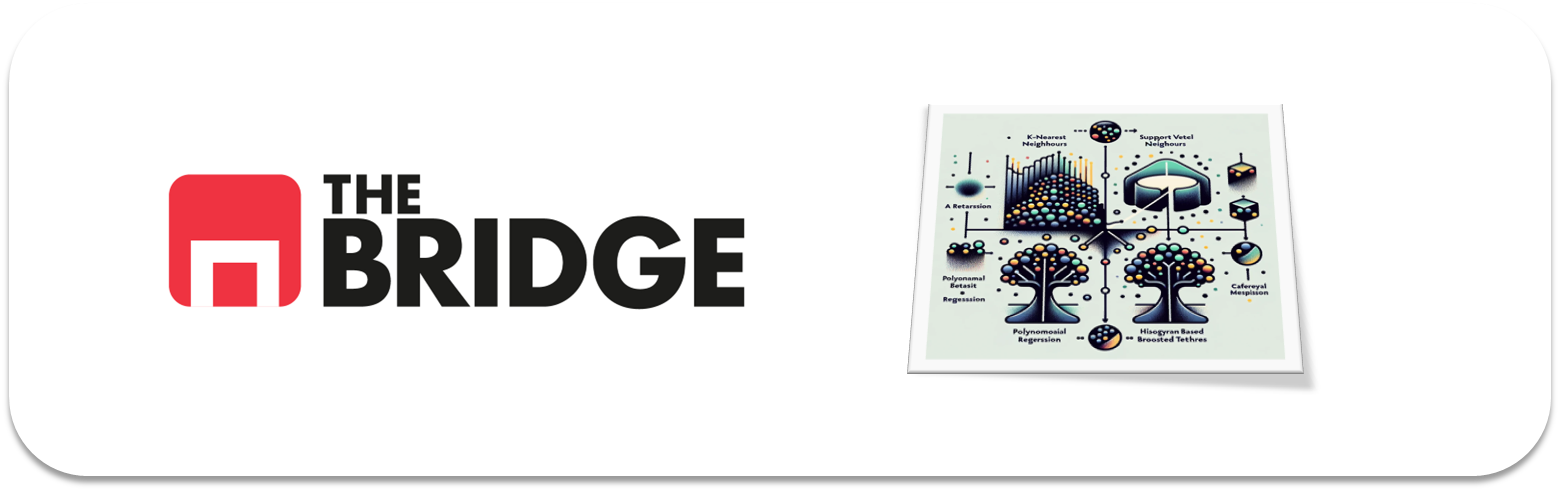

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [205]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb



%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 9) 
plt.style.use('ggplot') 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from bootcampviztools import pinta_distribucion_categoricas
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [161]:
df = pd.read_csv(r"data/credit_npo.csv")
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


- SeriousDlqin2yrs: Variable binaria que indica si una persona ha tenido un impago grave en los últimos dos años.
- RevolvingUtilizationOfUnsecuredLines: Ratio de utilización de líneas de crédito no aseguradas.
- age: Edad.
- NumberOfTime30-59DaysPastDueNotWorse: Número de veces que el individuo ha estado entre 30 y 59 días atrasado en el pago sin que haya sido peor.
- DebtRatio: Ratio de deuda.
- MonthlyIncome: Ingreso mensual.
- NumberOfOpenCreditLinesAndLoans: Número total de líneas de crédito y préstamos abiertos.
- NumberOfTimes90DaysLate: Número de veces que el individuo ha estado 90 días o más atrasado en el pago.
- NumberRealEstateLoansOrLines: Número de préstamos o líneas de crédito.
- NumberOfTime60-89DaysPastDueNotWorse: Número de veces que el individuo ha estado entre 60 y 89 días atrasado en el pago sin que haya sido peor.
- NumberOfDependents: Número de dependientes.


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

En general no tenemos nulos en ninguna feature exceptuando en MonthlyIncome que parece importante saber cuánto gana al mes el individuo, y exceptuando NumberOfDependents que también parece interesante saber si tiene personas a cargo para un buen resultado del modelado. Por otro lado son todos int y float lo cual nos va a ayudar mucho porque no tendremos que convertirlos sino manipular correctamente las features que nos interesan.

In [163]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerencia de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [164]:
# Aplicar la función card_tipo al dataset df
resultado_card_tipo = card_tipo(df)

# Mostrar el resultado
print(resultado_card_tipo)


                                       Card     %_Card     Tipo  \
SeriousDlqin2yrs                          2   0.015953    int64   
RevolvingUtilizationOfUnsecuredLines  10764  85.857861  float64   
age                                      78   0.622158    int64   
NumberOfTime30-59DaysPastDueNotWorse     10   0.079764    int64   
DebtRatio                             11547  92.103374  float64   
MonthlyIncome                          4167  33.237617  float64   
NumberOfOpenCreditLinesAndLoans          43   0.342985    int64   
NumberOfTimes90DaysLate                  13   0.103693    int64   
NumberRealEstateLoansOrLines             16   0.127622    int64   
NumberOfTime60-89DaysPastDueNotWorse      8   0.063811    int64   
NumberOfDependents                       10   0.079764  float64   

                                          tipo_sugerido  
SeriousDlqin2yrs                                Binaria  
RevolvingUtilizationOfUnsecuredLines  Numerica continua  
age                  

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Siendo el target una binaria tenemos claramente un problema de clasificación. O tiene problemas en dos años o no los tiene.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

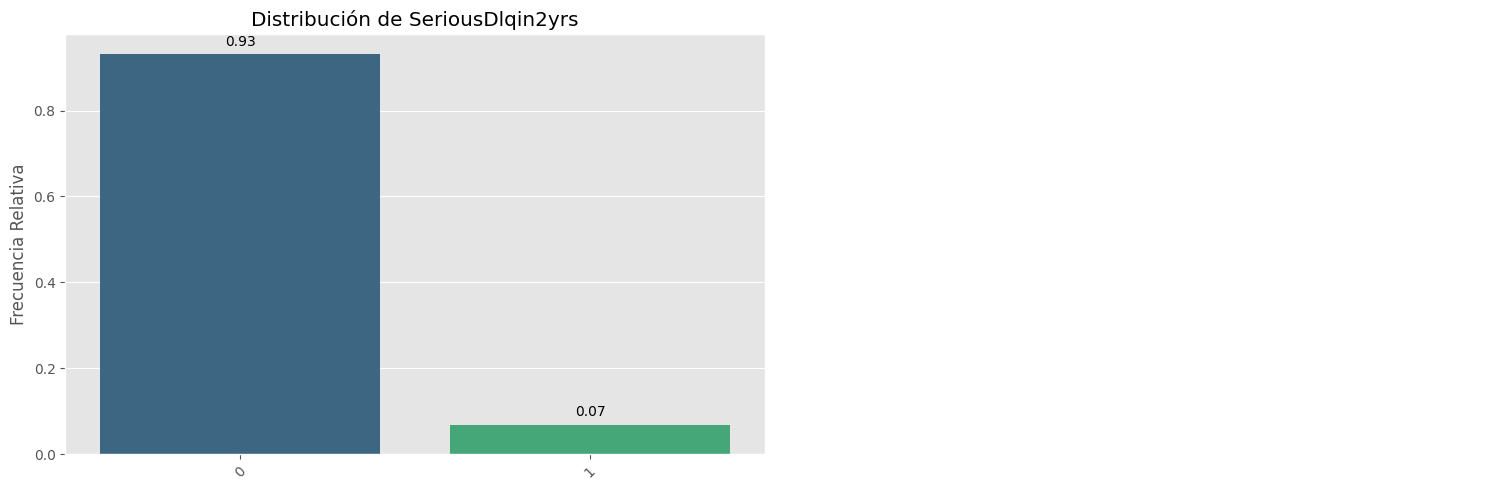

In [165]:
pinta_distribucion_categoricas(df, ["SeriousDlqin2yrs"], relativa=True, mostrar_valores=True)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [166]:
# Split en train y test

# Separar variables predictoras y target
X = df.drop(columns=["SeriousDlqin2yrs"])  # Variables independientes
y = df["SeriousDlqin2yrs"]  # Variable objetivo

# Hacer el split en train y test (80%-20%)
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

# Mostrar tamaños de los conjuntos
print(f"Tamaño de train_set: {train_set.shape}")
print(f"Tamaño de test_set: {test_set.shape}")


Tamaño de train_set: (10029, 11)
Tamaño de test_set: (2508, 11)


In [167]:
#Muestro la distribución de las variables numéricas
features_num = ["RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse",
    "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans",
    "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", "NumberOfDependents"
]

In [168]:
train_set[features_num].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
count,10029.000000,10029.000000,10029.00000,10029.000000,9458.000000,10029.000000,10029.000000,10029.000000,9889.000000
mean,0.332534,52.006681,0.40014,1.859805,6899.357158,8.480905,0.250972,0.997408,0.819395
std,0.368161,15.064668,3.96043,9.053464,12785.807976,5.150639,3.940818,1.145652,1.134976
min,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030773,41.000000,0.00000,0.142648,3481.000000,5.000000,0.000000,0.000000,0.000000
50%,0.164421,51.000000,0.00000,0.301520,5415.500000,8.000000,0.000000,1.000000,0.000000
75%,0.588571,62.000000,0.00000,0.506312,8290.750000,11.000000,0.000000,2.000000,1.000000
max,5.347652,101.000000,98.00000,99.000000,702500.000000,49.000000,98.000000,19.000000,10.000000


Vemos que age tiene un rango muy amplio de entre 21 y 101 años. El ratio de decuda varía hasta 99 lo que me hace pensar que habrá outliers. El ingreso mensual tiene una distribución hasta los 702500 lo que me hace pensar que pueda necesitar transformación o tratamiento de outliers va de 0 a 5 lo que puede ser que también tenga outliers.

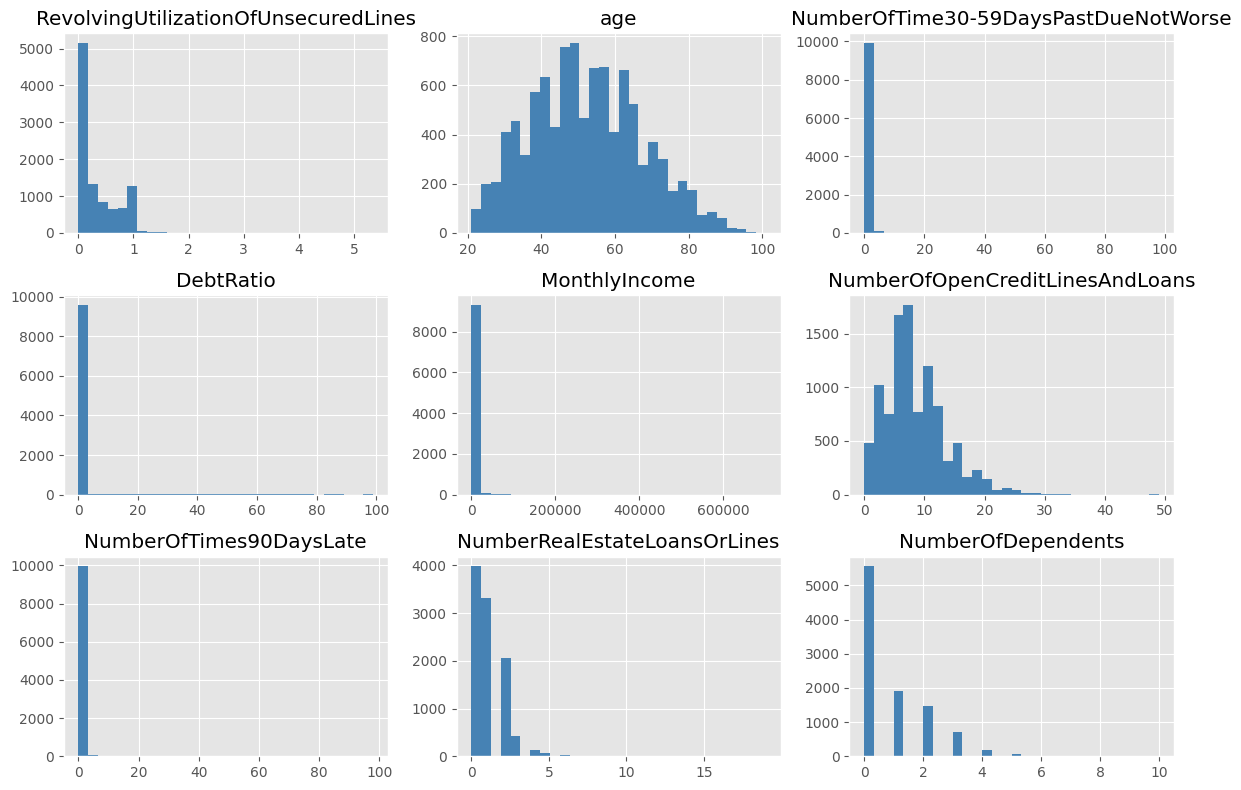

In [169]:
# Crear una figura con múltiples subgráficos
train_set[features_num].hist(figsize=(12, 8), bins = 30, color="steelblue")  
plt.tight_layout()
plt.show()

RevolvingUtilizationOfUnsecuredLines: Alta concentración en valores bajos, la mayoría cerca de 0. Baja utilización en líneas de crédito de la mayoría de las personas. Baja utilización de líneas de crédito = estabilidad financiera.
age: bastante normal. Yo no la tocaría.
NumberOfTime30-59DaysPastDueNotWorse: En general no hay retrasos en los pagos. Algunos aislados superan los 50 pero es un valor muy raro y puede ser un outlier perfectamente.
DebtRatio: También alta concentración en valores bajos. Existe algún valor que alcanza 99 que también puede ser un outlier.
MonthlyIncome: La mayoría tienen ingresos relativamente bajos. Aunque ese "bajos" son casi 7000 dólares de media, lo que pasa es que está considerando el máximo que es muy muy alto y puede ser outlier. Considerando que el percentil 75% está en 8000, tiene toda la pinta de ser un outlier.
NumberOfOpenCreditLinesAndLoans: Distribución hacia valores bajos. La amyoría de las personas tienen menos de 15 días de crédito, casi todas menores de 10. Más de 30 días de crédito se puede considerar atípico.
NumberOfTimes90DaysLate: Casi ninguno han estado en mora grave. Se observan algunos que superan los 50 pero puede ser un valor extremo. Esos son los que tendrían un riesgo financiero significativo.
NumberRealEstateLoansOrLines: La mayoría tienen 0 o 1 préstamos y algunos más de 5.
NumberOfDependents: La mayoría tiene 0 o 1 personas a cargo. Algunos hasta 10.

Muy bien pero KNN no maneja valores NaN.  
MontlyIncome. Divido las edades entre 21 y 40, 40 y 65 y de 65 en adelante. Calculo la media de ingresos y la asigno a los que tengan valores nulos según el rango de edad en el que estén:

In [170]:
# Mostrar 20 registros con edad y la asignación de grupo para analizar el problema
train_set["AgeGroup"] = pd.cut(train_set["age"], bins=[20, 40, 65, 101], labels=["21-40", "40-65", "65+"], include_lowest=True)
test_set["AgeGroup"] = pd.cut(test_set["age"], bins=[20, 40, 65, 101], labels=["21-40", "40-65", "65+"], include_lowest=True)

print(train_set[["age", "AgeGroup"]].head(20))
print(test_set[["age", "AgeGroup"]].head(20))

       age AgeGroup
5441    51    40-65
3948    73      65+
8819    28    21-40
315     40    21-40
10746   61    40-65
5199    51    40-65
7135    22    21-40
9782    56    40-65
7076    40    21-40
1624    78      65+
6733    65    40-65
8478    48    40-65
6756    32    21-40
4429    73      65+
11895   65    40-65
3366    38    21-40
4352    84      65+
1071    47    40-65
2742    68      65+
9279    44    40-65
       age AgeGroup
9525    69      65+
2984    38    21-40
6247    29    21-40
9931    56    40-65
7354    59    40-65
429     60    40-65
3160    50    40-65
2236    36    21-40
9178    44    40-65
4111    50    40-65
11166   53    40-65
5859    56    40-65
3355    48    40-65
1351    43    40-65
4115    60    40-65
2452    69      65+
8952    56    40-65
4833    47    40-65
2534    54    40-65
4874    24    21-40


In [171]:
# Calcular la media de MonthlyIncome por grupo de edad en train sin el warning
income_means = train_set.groupby("AgeGroup", observed=True)["MonthlyIncome"].mean()

# Verificar si hay valores obtenidos
print(income_means)

AgeGroup
21-40    5079.996639
40-65    7789.552448
65+      6590.815085
Name: MonthlyIncome, dtype: float64


In [172]:
# Imputar valores faltantes en train y test
for group in income_means.index:  # Acceder correctamente usando el índice real
    train_set.loc[train_set["MonthlyIncome"].isna() & (train_set["AgeGroup"] == group), "MonthlyIncome"] = income_means.loc[group]
    test_set.loc[test_set["MonthlyIncome"].isna() & (test_set["AgeGroup"] == group), "MonthlyIncome"] = income_means.loc[group]

# Verificar si quedan valores nulos después de la imputación
print("Nulos en train después de la imputación:", train_set["MonthlyIncome"].isna().sum())
print("Nulos en test después de la imputación:", test_set["MonthlyIncome"].isna().sum())

Nulos en train después de la imputación: 0
Nulos en test después de la imputación: 0


Ahora NumberOfDependants que va a ir con la moda.

In [173]:
# Calcular la moda de NumberOfDependents
mode_dependents = train_set["NumberOfDependents"].mode()[0]  # Extraer el valor más frecuente

# Imputar la moda en los valores nulos
train_set["NumberOfDependents"] = train_set["NumberOfDependents"].fillna(mode_dependents)
test_set["NumberOfDependents"] = test_set["NumberOfDependents"].fillna(mode_dependents)

# Verificar si quedan valores nulos después de la imputación
print("Nulos en train después de la imputación:", train_set["NumberOfDependents"].isna().sum())
print("Nulos en test después de la imputación:", test_set["NumberOfDependents"].isna().sum())

Nulos en train después de la imputación: 0
Nulos en test después de la imputación: 0


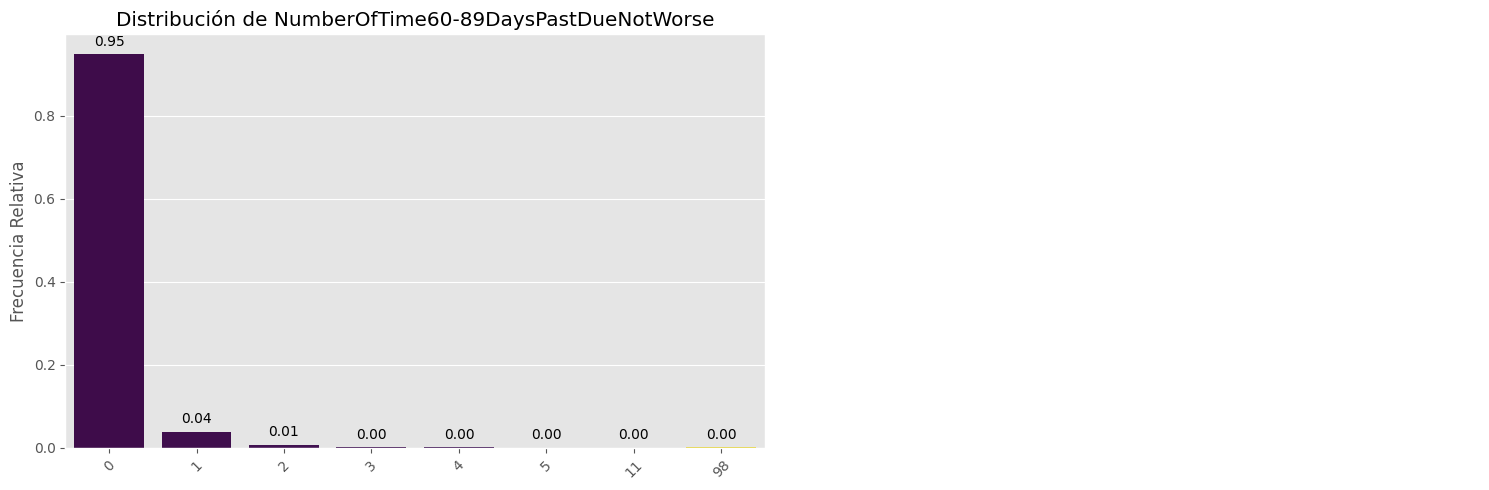

In [174]:
features_cat = ["NumberOfTime60-89DaysPastDueNotWorse"]
bt.pinta_distribucion_categoricas(train_set, features_cat, relativa = True, mostrar_valores = True)

Hay muchísimos individuos que no han estado nunca en la tesitura de deber entre 60 y 89 días. Después hay algunos que tardan un día o 2 y de tres en adelante es prácticamente anecdótico.
Esto lo puedo pasar a una categórica binara que me diga los que no han estado en problemas de pago de 60 a 89 días y los que sí. Que seguirá desbalanceada pero será más fácil de trabajar.

In [175]:
# Transformación en train y test
train_set["HasPastDue_60_89"] = (train_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)
test_set["HasPastDue_60_89"] = (test_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)

# Verificar la distribución en ambos conjuntos
print("Distribución en train:")
print(train_set["HasPastDue_60_89"].value_counts(normalize=True))
print("\nDistribución en test:")
print(test_set["HasPastDue_60_89"].value_counts(normalize=True))

Distribución en train:
HasPastDue_60_89
0    0.949347
1    0.050653
Name: proportion, dtype: float64

Distribución en test:
HasPastDue_60_89
0    0.948963
1    0.051037
Name: proportion, dtype: float64


In [176]:
# Definir el escalador. Le hago MinMax para no tener que hacer transformaciones logarítmicas.
scaler = MinMaxScaler()

# Aplicar escalado a las variables numéricas
train_set[features_num] = scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

# Mostrar un vistazo a los datos escalados
print(train_set[features_num].head())
print(test_set[features_num].head())

       RevolvingUtilizationOfUnsecuredLines     age  \
5441                               0.016650  0.3750   
3948                               0.003641  0.6500   
8819                               0.000000  0.0875   
315                                0.186998  0.2375   
10746                              0.076485  0.5000   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
5441                               0.000000   0.007574       0.007117   
3948                               0.000000   0.878788       0.009382   
8819                               0.010204   0.000818       0.004057   
315                                0.000000   0.009662       0.008421   
10746                              0.000000   0.004323       0.023535   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
5441                          0.122449                      0.0   
3948                          0.244898                      0.0   
8819                         

In [177]:
# Definir la variable objetivo con un nombre claro
target = "SeriousDlqin2yrs"


In [178]:
# Creo los juegos de train y test:
X_train = train_set[features_cat + features_num]
y_train = train_set[target]
X_test = test_set[features_cat + features_num]
y_test = test_set[target]

In [138]:
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [179]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9328
           1       0.75      0.32      0.45       701

    accuracy                           0.95     10029
   macro avg       0.85      0.66      0.71     10029
weighted avg       0.94      0.95      0.93     10029



In [180]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2345
           1       0.35      0.14      0.20       163

    accuracy                           0.93      2508
   macro avg       0.65      0.56      0.58      2508
weighted avg       0.90      0.93      0.91      2508



El modelo tiene alta precisión en la clase 0 (no morosos) pero bajo rendimiento en la clase 1 (morosos). El modelo no me identifica bien a los morosos.  
Macro avg en train tiene una precisión de 0.82, recall de 0.6 t f1 de 0.64 y en test 0.67, 0.55 y 0.57. Hay una ligera caída de métricas, corremos peligro de que el modelo esté intentando sobreajustar. El problema principal parece estar en la detección de la clase minoritaria. Aquí podemos ajustar el n_neighbors, podemos usar SMOTE, ajustar la métrica de la distancia de KNN y optimizar la selección de features.

In [181]:
# Valores de n_neighbors a probar
neighbors_range = [3, 5, 7, 10, 15]

# Evaluar KNN con distintos valores de n_neighbors
for n in neighbors_range:
    print(f"\n🔹 Probando con n_neighbors = {n}")
    
    # Definir y entrenar el modelo
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Evaluación en train
    y_train_pred = knn.predict(X_train)
    print("Train:")
    print(classification_report(y_train, y_train_pred))

    # Evaluación en test
    y_test_pred = knn.predict(X_test)
    print("Test:")
    print(classification_report(y_test, y_test_pred))


🔹 Probando con n_neighbors = 3
Train:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9328
           1       0.75      0.32      0.45       701

    accuracy                           0.95     10029
   macro avg       0.85      0.66      0.71     10029
weighted avg       0.94      0.95      0.93     10029

Test:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2345
           1       0.35      0.14      0.20       163

    accuracy                           0.93      2508
   macro avg       0.65      0.56      0.58      2508
weighted avg       0.90      0.93      0.91      2508


🔹 Probando con n_neighbors = 5
Train:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9328
           1       0.70      0.20      0.31       701

    accuracy                           0.94     10029
   macro avg       0.82      0.60      0.64 

| `n_neighbors` | Precision (Clase 1) | Recall (Clase 1) | F1-Score (Clase 1) |
|--------------|--------------------|------------------|------------------|
| **3**  | 0.75 (train) - 0.35 (test) | 0.32 (train) - 0.14 (test) | 0.45 (train) - 0.20 (test) |
| **5**  | 0.70 (train) - 0.40 (test) | 0.20 (train) - 0.12 (test) | 0.31 (train) - 0.18 (test) |
| **7**  | 0.66 (train) - 0.30 (test) | 0.16 (train) - 0.07 (test) | 0.25 (train) - 0.11 (test) |
| **10**  | 0.64 (train) - 0.24 (test) | 0.09 (train) - 0.03 (test) | 0.16 (train) - 0.05 (test) |
| **15**  | 0.58 (train) - 0.27 (test) | 0.09 (train) - 0.04 (test) | 0.16 (train) - 0.06 (test) |

La precisión de la clase 0 (no morosos) se mantiene para todos los valores de n_neighbors así que seguimos con la clase 1.  
La clase 1 tiene un recall bastante bajo en todos los casos para train y para test y baja según n_neighbors aumenta.  
El modelo sobreajusta a n_neighbors bajos pues el mejor n_neighbors es 3, para este parámetro precisión de la clase 1 en train es 0.75 y recall es 0.32 mientras que en test es 0.35 y 0.14. Esto nos dice que el modelo aprende bien en el train pero pierde capacidad de generalización en test.  
Voy a usar validación cruzada para evaluar la estabilidad en diferentes subconjuntos de train.


Divido train_set en varios subconjuntos y pruebo el modelo en cada uno de ellos. Cada vez se usa como test un subconjunto diferente mientras el resto entrena el modelo. Vamos aplicar validación cruzada cn 5 folds usando cross_val_score.

Si uso balanced accuracy caluclaría el accuracy para cada clase por separado, luego, hace el promedio de ambas clases dando el mismo peso a la clase minoritaria. Es útil para detectar a los morosos porque evita que el modelo parezca "bueno" sólo porque acierta a la clase mayoritaria. Pero, no considera la relación entre precisión y recall. Esto lo haría con F1-score macro.  
Si interesa mejorar la detección de los morosos específicamente, F1-score macro es más informativo porque penaliza más los falsos negativos. Probamos ambas a ver qué pasa.

In [182]:
# Lista para almacenar métricas
metricas_F1 = []

# Rango de valores de k
for k in range(1, 21):
    print(f"Para k= {k}, F1-score macro medio:", end=" ")
    
    # Definir modelo con k actual
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Calcular la validación cruzada usando F1-score macro
    f1_macro = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average="macro")))
    
    # Guardar métrica
    metricas_F1.append(f1_macro)
    
    print(f1_macro)

# Seleccionar el mejor valor de k basado en la métrica
best_k = np.argmax(metricas_F1) + 1
print(f"best_k para F1 {best_k}")

Para k= 1, F1-score macro medio: 0.5781558521258827
Para k= 2, F1-score macro medio: 0.5378854343434991
Para k= 3, F1-score macro medio: 0.5795452333872053
Para k= 4, F1-score macro medio: 0.536752820575874
Para k= 5, F1-score macro medio: 0.5681980049208646
Para k= 6, F1-score macro medio: 0.5389991885016372
Para k= 7, F1-score macro medio: 0.5607046119037239
Para k= 8, F1-score macro medio: 0.5434990883466521
Para k= 9, F1-score macro medio: 0.5607263028837669
Para k= 10, F1-score macro medio: 0.5408694063039684
Para k= 11, F1-score macro medio: 0.5551237743368127
Para k= 12, F1-score macro medio: 0.537815415196483
Para k= 13, F1-score macro medio: 0.5520160469118818
Para k= 14, F1-score macro medio: 0.5312716469226654
Para k= 15, F1-score macro medio: 0.5474949943998144
Para k= 16, F1-score macro medio: 0.536815916528733
Para k= 17, F1-score macro medio: 0.5529921947939644
Para k= 18, F1-score macro medio: 0.5399840627005088
Para k= 19, F1-score macro medio: 0.5530537483055916
Para 

In [183]:
metricas_balanced = []
for k in range(1,21):
    print(f"Para k_balanced= {k}, recall medio:", end = " ")
    model = KNeighborsClassifier(n_neighbors= k)
    balanced_accuracy = np.mean(cross_val_score(model,X_train,y_train, cv = 5, scoring= "balanced_accuracy"))
    metricas_balanced.append(balanced_accuracy)
    print(balanced_accuracy)
best_k = np.argmax(metricas_balanced) + 1 # Guardo el hiperparámetro óptimo para luego entrenar el mejor modelo
print(f"best_k_balanced {best_k}")    

Para k_balanced= 1, recall medio: 0.5738050109471631
Para k_balanced= 2, recall medio: 0.5293933767530608
Para k_balanced= 3, recall medio: 0.560206967798347
Para k_balanced= 4, recall medio: 0.5286132166113406
Para k_balanced= 5, recall medio: 0.5494692822333028
Para k_balanced= 6, recall medio: 0.5299657819002183
Para k_balanced= 7, recall medio: 0.5438706497310393
Para k_balanced= 8, recall medio: 0.5327591450072637
Para k_balanced= 9, recall medio: 0.5436973930232615
Para k_balanced= 10, recall medio: 0.5310987753862809
Para k_balanced= 11, recall medio: 0.5399528514185005
Para k_balanced= 12, recall medio: 0.5292188626973723
Para k_balanced= 13, recall medio: 0.538174939070026
Para k_balanced= 14, recall medio: 0.5255017163157076
Para k_balanced= 15, recall medio: 0.5351287057515134
Para k_balanced= 16, recall medio: 0.5285732501799796
Para k_balanced= 17, recall medio: 0.5384095935016737
Para k_balanced= 18, recall medio: 0.5305451464366191
Para k_balanced= 19, recall medio: 0.53

| `n_neighbors` | **Best k según F1 macro** | **Best k según Balanced Accuracy** |
|--------------|---------------------|---------------------------|
| **1** | 0.5782 | **0.5738** ✅ |
| **3** | **0.5795** ✅ | 0.5602 |

El mejor k de F1-score es 3 y el mejor k de balanced accuracy es 1

¿Qué uso? Balanced accuracy va a ser útil para evitar sesgos hacia la clase mayoritaria (no morosos) pero puede inflarse si la clase mayoritaria tiene alto recall, cosa que no pasa ahora pero podría.  
F1-score macro equilibra precisión y recall de ambas clases y castiga más los falsos negativos.  
Si el objetivo es mejorar la detección de la clase minoritaria F1-score es mejor. Si el objetivo es evaluar la capacidad de clasificación en general sin sesgos, balance accuracy vale.  
Voy a elejir F-1 score con k=3 para detectar más morosos.

In [184]:
# Definir y entrenar el modelo con k óptimo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluar el rendimiento
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Reporte de clasificación
from sklearn.metrics import classification_report

print("Evaluación en Train:")
print(classification_report(y_train, y_train_pred))

print("\nEvaluación en Test:")
print(classification_report(y_test, y_test_pred))

Evaluación en Train:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9328
           1       0.75      0.32      0.45       701

    accuracy                           0.95     10029
   macro avg       0.85      0.66      0.71     10029
weighted avg       0.94      0.95      0.93     10029


Evaluación en Test:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2345
           1       0.35      0.14      0.20       163

    accuracy                           0.93      2508
   macro avg       0.65      0.56      0.58      2508
weighted avg       0.90      0.93      0.91      2508



En train el recall de morosos subió a 0.32 pero en test sigue siendo bajo: 0.14. La precisión de test bajó a 0.35 lo que me indica que hay falsos positivos. Esto no ha sido suficiente para el modelo. Hay que aplicar SMOTE.

In [185]:
# Definir SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo en train (¡Nunca en test!)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar nueva distribución de clases

print(pd.Series(y_train_resampled).value_counts(normalize=True))  # Ver proporción de cada clase

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


In [186]:
# Entrenar KNN con datos balanceados
knn_resampled = KNeighborsClassifier(n_neighbors=3)
knn_resampled.fit(X_train_resampled, y_train_resampled)

# Evaluación en train
y_train_pred_resampled = knn_resampled.predict(X_train_resampled)
y_test_pred_resampled = knn_resampled.predict(X_test)

# Reporte de clasificación
print("Evaluación en Train (con SMOTE):")
print(classification_report(y_train_resampled, y_train_pred_resampled))

print("\nEvaluación en Test (con SMOTE):")
print(classification_report(y_test, y_test_pred_resampled))

Evaluación en Train (con SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      9328
           1       0.92      0.99      0.96      9328

    accuracy                           0.95     18656
   macro avg       0.96      0.95      0.95     18656
weighted avg       0.96      0.95      0.95     18656


Evaluación en Test (con SMOTE):
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2345
           1       0.19      0.41      0.26       163

    accuracy                           0.85      2508
   macro avg       0.57      0.65      0.59      2508
weighted avg       0.91      0.85      0.87      2508



| Métrica | Antes de SMOTE (Test) | Después de SMOTE (Test) | Cambio |
|---------|----------------------|----------------------|--------|
| **Precision (Clase 1)** | **0.35** | **0.19** | 🔻 Bajó |
| **Recall (Clase 1)** | **0.14** | **0.41** | 🔼 Subió mucho |
| **F1-score (Clase 1)** | **0.20** | **0.26** | 🔼 Mejoró |
| **Accuracy general** | **0.93** | **0.85** | 🔻 Bajó |
| **Macro avg F1-score** | **0.58** | **0.59** | 🔼 Ligera mejora |

El modelo ahora detecta muchos más morosos pues me sube de 0.14 a 0.41 el recall de la clase 1.  
La precisión ha bajado hasta puntos muy muy bajos lo que indica muchos falsos positivos, clientes que no son morosos pero los clasifica como morosos.  
Vamos a probar Random Forest: para el Random Forest aprovecho que ya he pasado el train por SMOTE y ya tengo los datos balanceados. El test, evidentemente, va sin balancear.

In [187]:
# Definir el modelo con parámetros iniciales
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar con los datos balanceados (SMOTE)
rf.fit(X_train_resampled, y_train_resampled)

# Evaluación en train y test
y_train_pred_rf = rf.predict(X_train_resampled)
y_test_pred_rf = rf.predict(X_test)

# Reporte de clasificación
print("Evaluación en Train (Random Forest con SMOTE):")
print(classification_report(y_train_resampled, y_train_pred_rf))

print("\nEvaluación en Test (Random Forest con SMOTE):")
print(classification_report(y_test, y_test_pred_rf))

Evaluación en Train (Random Forest con SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9328
           1       1.00      1.00      1.00      9328

    accuracy                           1.00     18656
   macro avg       1.00      1.00      1.00     18656
weighted avg       1.00      1.00      1.00     18656


Evaluación en Test (Random Forest con SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2345
           1       0.43      0.34      0.38       163

    accuracy                           0.93      2508
   macro avg       0.69      0.65      0.67      2508
weighted avg       0.92      0.93      0.92      2508



Uy esto huele a overfitting.

| Métrica | KNN con SMOTE (Test) | Random Forest con SMOTE (Test) | Cambio |
|---------|----------------------|-------------------------------|--------|
| **Precision (Clase 1)** | **0.19** | **0.43** | 🔼 Mucho mejor |
| **Recall (Clase 1)** | **0.41** | **0.34** | 🔻 Ligera caída |
| **F1-score (Clase 1)** | **0.26** | **0.38** | 🔼 Mejor |
| **Accuracy general** | **0.85** | **0.93** | 🔼 Mejor |
| **Macro avg F1-score** | **0.59** | **0.67** | 🔼 Mejor |

Random forest está muchísimo mejor que KNN y está sin optimizar pero tiene pinta de sobreajustar. Veamos si puedo ajustar hiperparámetros:

In [188]:
# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "class_weight": ["balanced"]

}

# Aplicar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="recall", n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Mostrar el mejor modelo encontrado
best_rf = grid_search.best_estimator_
print("Mejor combinación de hiperparámetros:", grid_search.best_params_)

Mejor combinación de hiperparámetros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Definir el mejor modelo según Grid Search
rf_best = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, class_weight="balanced", random_state=42)

# Entrenar con datos balanceados (SMOTE)
rf_best.fit(X_train_resampled, y_train_resampled)

# Evaluación en train y test
y_train_pred_rf_best = rf_best.predict(X_train_resampled)
y_test_pred_rf_best = rf_best.predict(X_test)

# Reporte de clasificación
print("Evaluación en Train (Random Forest optimizado):")
print(classification_report(y_train_resampled, y_train_pred_rf_best))

print("\nEvaluación en Test (Random Forest optimizado):")
print(classification_report(y_test, y_test_pred_rf_best))

Evaluación en Train (Random Forest optimizado):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9328
           1       1.00      1.00      1.00      9328

    accuracy                           1.00     18656
   macro avg       1.00      1.00      1.00     18656
weighted avg       1.00      1.00      1.00     18656


Evaluación en Test (Random Forest optimizado):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2345
           1       0.18      0.09      0.12       163

    accuracy                           0.91      2508
   macro avg       0.56      0.53      0.54      2508
weighted avg       0.89      0.91      0.90      2508



In [189]:
# Sigue sobreajustando. Voy a poner un max_depth de 10, min_samples_leaf de 5 y min_samples_split de 10 a ve que pasa.
# Definir el mejor modelo según Grid Search
rf_best = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, class_weight="balanced", random_state=42)

# Entrenar con datos balanceados (SMOTE)
rf_best.fit(X_train_resampled, y_train_resampled)

# Evaluación en train y test
y_train_pred_rf_best = rf_best.predict(X_train_resampled)
y_test_pred_rf_best = rf_best.predict(X_test)

# Reporte de clasificación
print("Evaluación en Train (Random Forest optimizado):")
print(classification_report(y_train_resampled, y_train_pred_rf_best))

print("\nEvaluación en Test (Random Forest optimizado):")
print(classification_report(y_test, y_test_pred_rf_best))

Evaluación en Train (Random Forest optimizado):
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      9328
           1       0.95      0.90      0.93      9328

    accuracy                           0.93     18656
   macro avg       0.93      0.93      0.93     18656
weighted avg       0.93      0.93      0.93     18656


Evaluación en Test (Random Forest optimizado):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2345
           1       0.34      0.48      0.40       163

    accuracy                           0.91      2508
   macro avg       0.65      0.71      0.67      2508
weighted avg       0.92      0.91      0.91      2508



| Métrica | Random Forest Base (Test) | Random Forest Optimizado (Test) | Cambio |
|---------|--------------------------|--------------------------------|--------|
| **Precision (Clase 1)** | **0.43** | **0.34** | 🔻 Bajó |
| **Recall (Clase 1)** | **0.33** | **0.48** | 🔼 Mejor |
| **F1-score (Clase 1)** | **0.37** | **0.40** | 🔼 Mejor |
| **Accuracy general** | **0.93** | **0.91** | 🔻 Ligera caída |
| **Macro avg F1-score** | **0.67** | **0.67** | 🔹 Igual |

El recall ha mejorado en morosos, se detecta más casos positivos. Menor precisión, aumentan los falsos positivos. El accuracy baja algo pero sigue siendo bueno.

In [192]:
# Definir el modelo base
rf_no_smote = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "class_weight": ["balanced"]

}

# Aplicar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(rf_no_smote, param_grid, cv=5, scoring="recall", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar el mejor modelo encontrado
best_rf_no_smote = grid_search.best_estimator_
print("Mejor combinación de hiperparámetros sin SMOTE:", grid_search.best_params_)

Mejor combinación de hiperparámetros sin SMOTE: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [193]:
rf_no_smote_opt = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=2, min_samples_leaf=10, class_weight="balanced", random_state=42)

# Entrenar con el dataset original sin SMOTE
rf_no_smote_opt.fit(X_train, y_train)

# Evaluación en train y test
y_train_pred_rf_no_smote_opt = rf_no_smote_opt.predict(X_train)
y_test_pred_rf_no_smote_opt = rf_no_smote_opt.predict(X_test)

# Reporte de clasificación
print("Evaluación en Train (Random Forest sin SMOTE pero con class_weight=balanced):")
print(classification_report(y_train, y_train_pred_rf_no_smote_opt))

print("\nEvaluación en Test (Random Forest sin SMOTE pero con class_weight=balanced):")
print(classification_report(y_test, y_test_pred_rf_no_smote_opt))

Evaluación en Train (Random Forest sin SMOTE pero con class_weight=balanced):
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      9328
           1       0.22      0.80      0.35       701

    accuracy                           0.79     10029
   macro avg       0.60      0.80      0.61     10029
weighted avg       0.93      0.79      0.84     10029


Evaluación en Test (Random Forest sin SMOTE pero con class_weight=balanced):
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      2345
           1       0.19      0.71      0.30       163

    accuracy                           0.79      2508
   macro avg       0.58      0.75      0.59      2508
weighted avg       0.92      0.79      0.84      2508



| Métrica | RF con SMOTE Optimizado (Test) | RF sin SMOTE Optimizado (Test) | Cambio |
|---------|---------------------------------|---------------------------------|--------|
| **Precision (Clase 1)** | **0.34** | **0.19** | 🔻 Bajó |
| **Recall (Clase 1)** | **0.48** | **0.71** | 🔼 Mejor |
| **F1-score (Clase 1)** | **0.40** | **0.30** | 🔻 Bajó |
| **Accuracy general** | **0.91** | **0.79** | 🔻 Bajó |
| **Macro avg F1-score** | **0.67** | **0.59** | 🔻 Bajó |

Ha mejorade el recall con un accuracy bastante decente. Hay más falsos positivos porque la precisión bajó, y hasta un número que es demasiado bajo. Y peor equilibrio global entre las clases por peor F1.

Vamos a probar LightGBM, principalmente porque puede trabajar los nulos sin mayor problema y así se puede ver cómo funciona el dataset inicial sin modificaciones.

In [195]:
# Definir los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertimos los datos a formato adecuado para LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [196]:
# Definir el modelo con parámetros optimizados y profundidad limitada
lgbm_clf = LGBMClassifier(
    n_estimators=300,  # Número de árboles
    learning_rate=0.05,  # Tasa de aprendizaje
    max_depth=10,  # Limitamos la profundidad para evitar sobreajuste
    class_weight="balanced",  # Ajuste para datos desbalanceados
    random_state=42,  # Reproducibilidad
    verbose=-100  # Reduce la salida en consola
)

# Entrenar el modelo con el dataset original sin imputar nulos
lgbm_clf.fit(X_train, y_train)

# Predicciones en train y test
y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

# Evaluación del modelo
print("Evaluación en Train:")
print(classification_report(y_train, y_train_pred))

print("\nEvaluación en Test:")
print(classification_report(y_test, y_test_pred))

Evaluación en Train:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      9328
           1       0.53      0.99      0.69       701

    accuracy                           0.94     10029
   macro avg       0.76      0.96      0.83     10029
weighted avg       0.97      0.94      0.95     10029


Evaluación en Test:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2345
           1       0.27      0.53      0.36       163

    accuracy                           0.88      2508
   macro avg       0.62      0.72      0.64      2508
weighted avg       0.92      0.88      0.89      2508



| Métrica | RF con SMOTE Optimizado (Test) | RF sin SMOTE Optimizado (Test) | LightGBM Optimizado (Test) | Mejor opción |
|---------|---------------------------------|---------------------------------|-----------------------------|--------------|
| **Precision (Clase 1)** | **0.34** | **0.19** | **0.27** | ✅ RF con SMOTE |
| **Recall (Clase 1)** | **0.48** | **0.71** | **0.53** | ✅ RF sin SMOTE |
| **F1-score (Clase 1)** | **0.40** | **0.30** | **0.36** | ✅ RF con SMOTE |
| **Accuracy general** | **0.91** | **0.79** | **0.88** | ✅ RF con SMOTE |
| **Macro avg F1-score** | **0.67** | **0.59** | **0.64** | ✅ RF con SMOTE |

Según accuracy podríamos tener cualquiera de los tres pero mejor sería en RF con SMOTE. Pero, según recall es preferible el RF sin SMOTE. Sin embargo para el train los datos eran bastante buenos.

In [ ]:
lgbm_clf_opt = LGBMClassifier(random_state=42, verbose=-100)

# Definir la rejilla de hiperparámetros
param_grid = {
    "n_estimators": [100, 300, 500],  # Número de árboles
    "learning_rate": [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    "max_depth": [5, 10, 15],  # Profundidad máxima del árbol
    "num_leaves": [20, 31, 50],  # Número de hojas en cada árbol
    "min_child_samples": [10, 20, 30],  # Mínimo de muestras en una hoja
}

# Ejecutar Grid Search con validación cruzada
grid_search = GridSearchCV(lgbm_clf_opt, param_grid, cv=5, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar el mejor modelo encontrado
best_params_opt = grid_search.best_params_
print("Mejor combinación de hiperparámetros:", best_params_opt)

Mejor combinación de hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 30, 'n_estimators': 500, 'num_leaves': 20}


In [198]:
# Definir el modelo optimizado con los hiperparámetros encontrados en Grid Search
lgbm_clf_final = LGBMClassifier(**best_params_opt, class_weight="balanced", random_state=42, verbose=-100)

# Entrenar el modelo con el dataset original
lgbm_clf_final.fit(X_train, y_train)

# Predicciones en train y test
y_train_pred_opt = lgbm_clf_final.predict(X_train)
y_test_pred_opt = lgbm_clf_final.predict(X_test)

# Evaluación del modelo optimizado
print("Evaluación en Train (LightGBM optimizado):")
print(classification_report(y_train, y_train_pred_opt))

print("\nEvaluación en Test (LightGBM optimizado):")
print(classification_report(y_test, y_test_pred_opt))

Evaluación en Train (LightGBM optimizado):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      9328
           1       0.62      1.00      0.76       701

    accuracy                           0.96     10029
   macro avg       0.81      0.98      0.87     10029
weighted avg       0.97      0.96      0.96     10029


Evaluación en Test (LightGBM optimizado):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2345
           1       0.29      0.48      0.36       163

    accuracy                           0.89      2508
   macro avg       0.63      0.70      0.65      2508
weighted avg       0.92      0.89      0.90      2508



| Métrica | RF con SMOTE Optimizado (Test) | RF sin SMOTE Optimizado (Test) | LightGBM sin optimizar (Test) | LightGBM optimizado (Test) | Mejor opción |
|---------|---------------------------------|---------------------------------|--------------------------------|-----------------------------|--------------|
| **Precision (Clase 1)** | **0.34** | **0.19** | **0.27** | **0.29** | ✅ LightGBM optimizado |
| **Recall (Clase 1)** | **0.48** | **0.71** | **0.53** | **0.48** | ✅ RF sin SMOTE |
| **F1-score (Clase 1)** | **0.40** | **0.30** | **0.36** | **0.36** | ✅ RF con SMOTE / LightGBM optimizado |
| **Accuracy general** | **0.91** | **0.79** | **0.88** | **0.89** | ✅ RF con SMOTE |
| **Macro avg F1-score** | **0.67** | **0.59** | **0.64** | **0.65** | ✅ LightGBM optimizado |

El accuracy no es malo, podemos vivir con un 0.89. Para el train los datos son muyt buenos pero para el recall del test nos va mejor el RF sin SMOTE. Si negocio lo que nos pide es el mejor recall deberíamos tirar con ese aunque no es tampoco una gran maravilla.

Voy a combinar RandomForest con LightGBM con Voting Clasifier:

In [199]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

# Definir los modelos base con los mejores hiperparámetros
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, class_weight="balanced", random_state=42)
lgbm_model = LGBMClassifier(learning_rate=0.1, max_depth=5, min_child_samples=30, n_estimators=500, num_leaves=20, class_weight="balanced", random_state=42, verbose=-100)

# Definir el Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf_model),
    ('LightGBM', lgbm_model)
], voting='soft')  # Soft Voting usa probabilidades en lugar de mayorías

# Entrenar el modelo combinado
ensemble_model.fit(X_train, y_train)

# Evaluación en test
y_test_pred_ensemble = ensemble_model.predict(X_test)

# Reporte de clasificación
print("Evaluación en Test (Combinación de RF + LightGBM):")
print(classification_report(y_test, y_test_pred_ensemble))

Evaluación en Test (Combinación de RF + LightGBM):
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2345
           1       0.29      0.50      0.37       163

    accuracy                           0.89      2508
   macro avg       0.63      0.71      0.65      2508
weighted avg       0.92      0.89      0.90      2508



| Métrica | RF con SMOTE Optimizado (Test) | RF sin SMOTE Optimizado (Test) | LightGBM sin optimizar (Test) | LightGBM optimizado (Test) | RF + LightGBM (Voting) | Mejor opción |
|---------|---------------------------------|---------------------------------|--------------------------------|-----------------------------|-------------------------|--------------|
| **Precision (Clase 1)** | **0.34** | **0.19** | **0.27** | **0.29** | **0.29** | ✅ LightGBM optimizado / RF + LightGBM |
| **Recall (Clase 1)** | **0.48** | **0.71** | **0.53** | **0.48** | **0.50** | ✅ RF sin SMOTE |
| **F1-score (Clase 1)** | **0.40** | **0.30** | **0.36** | **0.36** | **0.37** | ✅ RF + LightGBM |
| **Accuracy general** | **0.91** | **0.79** | **0.88** | **0.89** | **0.89** | ✅ RF con SMOTE |
| **Macro avg F1-score** | **0.67** | **0.59** | **0.64** | **0.65** | **0.65** | ✅ LightGBM optimizado / RF + LightGBM |

La precisión se queda igual, El recall sigue siendo mejor en RF sin SMOTE, el F1 mejora un punto y la macro se queda como con el LightGBM. No hemos ganado mucho.

La combinación RF + LightGBM mejora el F1-score, lo que indica mejor balance entre precisión y recall.
Si queremos el mayor recall posible, RF sin SMOTE sigue siendo la mejor opción.
Si buscamos equilibrio entre precisión y recall, RF + LightGBM es la mejor elección.
Si priorizamos accuracy general, RF con SMOTE es la mejor opción


Análisis de errores:

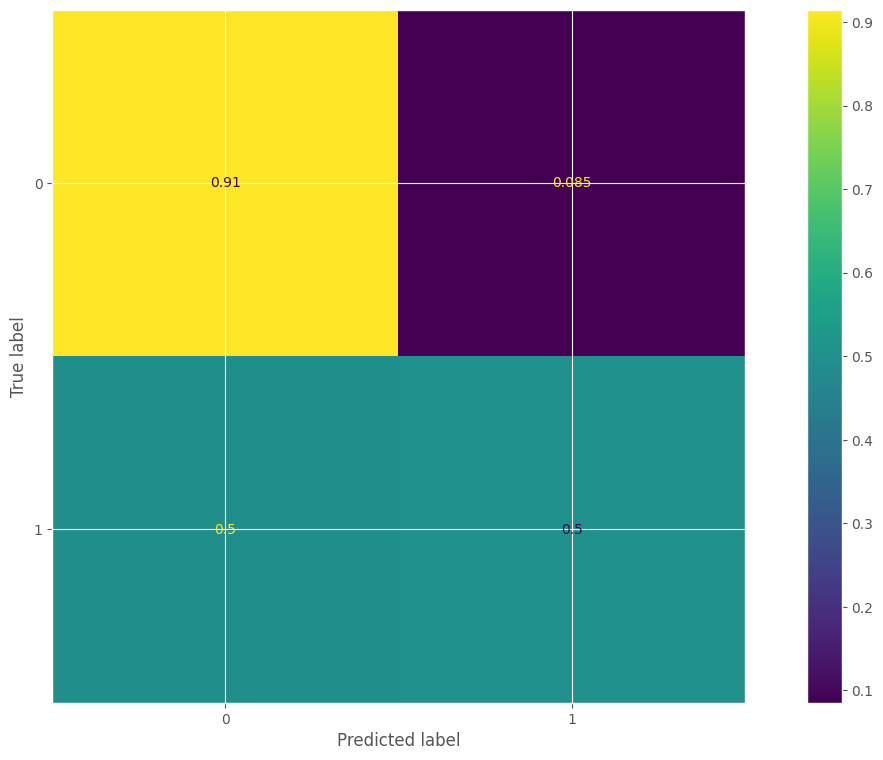

In [207]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generar la matriz de confusión normalizada con el modelo combinado RF + LightGBM
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_ensemble, normalize="true")

Para la clase 0 el 91% de las predicciones son correctas. No morosos clasificados como no morosos correctamente.  
el 8,5% fueron falsos positivos: no morosos predichos como morosos  
Para la clase 1 el 50% fueron falsos negativos (el modelo dijo moroso cuando no lo era) y el 50% fueron predicciones correctas (morosos clasificados como morosos).  
Si yo fuera negocio diría que hay que buscar algo mejor sin duda.  
Podríamos usar XGBoost o CatBoost que pueden mejorar el recall o refinar el class_weight y dar más peso a los morosos.